Logistic Regression from Scratch with NumPy

Step 1: Generate Synthetic Data for Binary Classification

We'll create a dataset where points above a threshold value belong to one class and points below belong to another class, with some added noise.

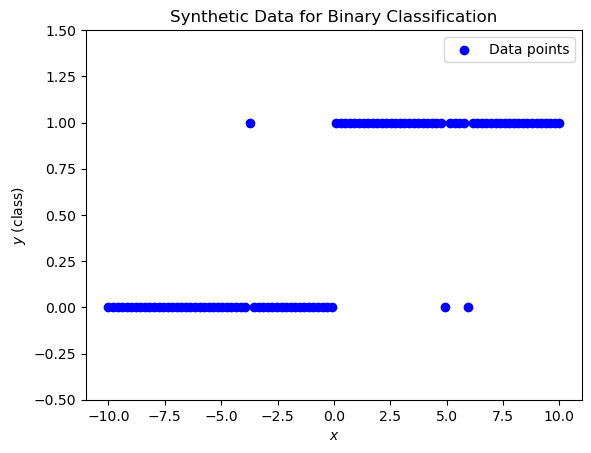

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
x = np.linspace(-10, 10, 100)  # Feature values from -10 to 10
y_true = (x > 0).astype(int)    # Binary labels: 1 if x > 0, else 0

# Add some noise to make the classification less perfect
noise = np.random.normal(0, 0.3, y_true.shape)
y = np.clip(y_true + noise, 0, 1).round().astype(int)

# Plot the data
plt.scatter(x, y, color="blue", label="Data points")
plt.ylim(-0.5, 1.5)
plt.xlabel("$x$")
plt.ylabel("$y$ (class)")
plt.title("Synthetic Data for Binary Classification")
plt.legend()
plt.show()


Define the Sigmoid Function

The sigmoid function is a mathematical function that maps any real-valued number into the range (0, 1). It is commonly used in logistic regression and neural networks to introduce non-linearity into the model and to map predicted values to probabilities.

The sigmoid function is defined as:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

Where:
- $ \sigma(z) $ is the sigmoid of $ z $
- $ z $ is the input value (can be a scalar, vector, or matrix)
- $ e $ is the base of the natural logarithm

The sigmoid function has an "S" shaped curve and is useful for binary classification problems because it outputs a value between 0 and 1, which can be interpreted as a probability.


In [2]:
def sigmoid(z):
    """
    Compute the sigmoid of z.
    
    Parameters:
    - z: Input (can be a scalar, vector, or matrix).
    
    Returns:
    - Sigmoid of z.
    """
    return 1 / (1 + np.exp(-z))


### Logistic Regression Model

Logistic regression is a statistical method for binary classification that models the probability of a binary outcome based on one or more predictor variables. It is a type of regression analysis used for predicting the outcome of a categorical dependent variable based on one or more predictor variables.

#### Model Representation

The logistic regression model predicts the probability of the positive class (class 1) as a function of the input features. The model can be represented as:

$$
P(y=1|x) = \sigma(z)
$$

where:
- \( P(y=1|x) \) is the probability that the output \( y \) is 1 given the input \( x \).
- \( \sigma(z) \) is the sigmoid function.
- \( z \) is the linear combination of the input features and the model parameters.

The linear combination \( z \) is given by:

$$
z = \theta_0 + \theta_1 x
$$

where:
- \( \theta_0 \) is the bias (intercept) term.
- \( \theta_1 \) is the weight (slope) term.
- \( x \) is the input feature.

#### Sigmoid Function

The sigmoid function maps any real-valued number into the range (0, 1) and is defined as:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

The sigmoid function outputs a value between 0 and 1, which can be interpreted as a probability.

#### Decision Boundary

The decision boundary is the value of \( x \) at which the predicted probability is 0.5. This can be found by setting \( P(y=1|x) = 0.5 \) and solving for \( x \):

$$
\sigma(z) = 0.5 \implies z = 0 \implies \theta_0 + \theta_1 x = 0 \implies x = -\frac{\theta_0}{\theta_1}
$$

#### Loss Function

The loss function used in logistic regression is the binary cross-entropy (log loss), which measures the performance of the classification model. It is defined as:

$$
L(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)}) \right]
$$

where:
- \( m \) is the number of training examples.
- \( y^{(i)} \) is the true label of the \( i \)-th training example.
- \( \hat{y}^{(i)} \) is the predicted probability of the \( i \)-th training example.

The goal of logistic regression is to find the parameters \( \theta_0 \) and \( \theta_1 \) that minimize the loss function.
#### Gradient Descent

Gradient descent is an optimization algorithm used to minimize the loss function by iteratively updating the model parameters. The update rule for the parameters in logistic regression is given by:

$$
\theta_j := \theta_j - \alpha \frac{\partial L(\theta)}{\partial \theta_j}
$$

where:
- $\theta_j$ is the $j$-th parameter (either $\theta_0$ or $\theta_1$).
- $\alpha$ is the learning rate.
- $\frac{\partial L(\theta)}{\partial \theta_j}$ is the partial derivative of the loss function with respect to $\theta_j$.

The partial derivatives of the binary cross-entropy loss function with respect to the parameters are:

$$
\frac{\partial L(\theta)}{\partial \theta_0} = -\frac{1}{m} \sum_{i=1}^{m} \left( y^{(i)} - \hat{y}^{(i)} \right)
$$

$$
\frac{\partial L(\theta)}{\partial \theta_1} = -\frac{1}{m} \sum_{i=1}^{m} \left( y^{(i)} - \hat{y}^{(i)} \right) x^{(i)}
$$

where:
- $y^{(i)}$ is the true label of the $i$-th training example.
- $\hat{y}^{(i)}$ is the predicted probability of the $i$-th training example.
- $x^{(i)}$ is the input feature of the $i$-th training example.

By iteratively updating the parameters using the gradient descent algorithm, we can minimize the loss function and find the optimal parameters for the logistic regression model.

In [3]:
# Define the logistic regression model
def logistic_model(x, theta_1, theta_0):
    """
    Logistic regression model for binary classification.
    
    Parameters:
    - x: Independent variable.
    - theta_1: Weight (slope).
    - theta_0: Bias (intercept).
    
    Returns:
    - Predicted probability of class 1.
    """
    z = theta_1 * x + theta_0
    return sigmoid(z)
